In [124]:
import typing as t
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
TRAIN_PATH = "../../data/train.csv"
TEST_PATH = "../../data/test.csv"

SUBMISSION_PATH = "../../data/sample_submission.csv"

In [3]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

subm = pd.read_csv(SUBMISSION_PATH)

In [4]:
print(train_df.columns.tolist())

['district_area', 'road_distance_1', 'road_distance_2', 'year_of_construction', 'bulvar_ring_km', 'bus_station_distance', 'cafe_count', 'fitness_center_distance', 'floor', 'district_population', 'total_area', 'green_part', 'green_zone_distance', 'healthcare_centers_count', 'id', 'kitchen_area', 'kremlin_distance', 'leisure_count', 'living_area', 'market_count', 'wall_material', 'floors_num', 'metro_minutes', 'mkad_distance', 'rooms_num', 'office_count', 'park_distance', 'result_price', 'product_type', 'public_transport_station_distance', 'sadovoe_km', 'base_school_distance', 'sport_count', 'state', 'district_name', 'timestamp', 'malls_count', 'railway_station_distance']


# Whole data

In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27232 entries, 0 to 27231
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   district_area                      27232 non-null  float64
 1   road_distance_1                    27232 non-null  float64
 2   road_distance_2                    27232 non-null  float64
 3   year_of_construction               14314 non-null  float64
 4   bulvar_ring_km                     27232 non-null  float64
 5   bus_station_distance               27232 non-null  float64
 6   cafe_count                         27232 non-null  int64  
 7   fitness_center_distance            27232 non-null  float64
 8   floor                              27065 non-null  float64
 9   district_population                27232 non-null  int64  
 10  total_area                         27232 non-null  int64  
 11  green_part                         27232 non-null  flo

In [12]:
train_df[["living_area", "total_area", "kitchen_area"]].describe()

,district_area,road_distance_1,road_distance_2,year_of_construction,bulvar_ring_km,bus_station_distance,cafe_count,fitness_center_distance,floor,district_population,...,office_count,park_distance,result_price,public_transport_station_distance,sadovoe_km,base_school_distance,sport_count,state,malls_count,railway_station_distance
count,2.723200e+04,27232.000000,27232.000000,1.431400e+04,27232.000000,27232.000000,27232.000000,27232.000000,27065.000000,2.723200e+04,...,27232.000000,27232.000000,2.723200e+04,27232.000000,27232.000000,27232.000000,27232.000000,14135.000000,27232.000000,27232.000000
mean,1.720743e+07,1.878249,3.403441,3.289755e+03,14.989800,9.887480,261.142920,1.137891,7.680473,1.484722e+05,...,69.944771,3.082367,6.996853e+06,4.598270,14.022456,1.262056,52.682689,2.145101,30.152027,17.158996
std,1.975391e+07,1.301804,1.880022,1.675861e+05,8.339670,7.192342,504.904645,1.519172,5.327727,2.847112e+05,...,152.546008,3.947962,4.655531e+06,13.538111,8.213059,2.874984,45.742442,0.876860,23.689530,10.168566
min,2.081628e+06,0.000364,0.001935,0.000000e+00,0.001947,0.062026,0.000000,0.000000,0.000000,2.546000e+03,...,0.000000,0.003737,1.000000e+05,0.033646,0.000355,0.000000,0.000000,1.000000,0.000000,0.136715
25%,7.128794e+06,0.775735,2.100833,1.966000e+03,9.317668,5.211726,20.000000,0.358399,3.000000,3.116700e+04,...,2.000000,0.973781,4.682768e+06,1.192541,8.372803,0.269716,11.000000,1.000000,7.000000,10.030476
50%,1.032047e+07,1.724121,3.197746,1.979000e+03,13.584696,7.447586,108.000000,0.652145,7.000000,8.572100e+04,...,15.000000,1.799915,6.200000e+06,1.894101,12.712409,0.465666,48.000000,2.000000,31.000000,14.721305
75%,1.788191e+07,2.767177,4.331123,2.004000e+03,19.747017,13.180831,221.000000,1.306011,11.000000,1.253540e+05,...,52.000000,3.345030,8.100000e+06,3.135588,18.537641,0.834949,75.000000,3.000000,43.000000,24.061214
max,2.060718e+08,6.995416,13.798346,2.005201e+07,69.984874,74.469967,2645.000000,24.852968,77.000000,1.716730e+06,...,789.000000,47.351538,1.111111e+08,208.956021,68.853047,47.394706,218.000000,33.000000,120.000000,90.888919


In [5]:
subm

,id,result_price
0,27235,64104
1,27236,9746
2,27237,17640
3,27238,40390
4,27239,76229
...,...,...
3234,30469,90258
3235,30470,87554
3236,30471,78481
3237,30472,18819


## Utils

In [48]:
def plot_hists(df: pd.DataFrame, f_names: t.List[str]) -> None:
    num_rows = int(math.ceil(len(f_names)/2))

    fig, axs = plt.subplots(num_rows, 2, figsize=(14, 14))

    for i, f_name in enumerate(f_names):
        sns.histplot(data=df, x=f_name, kde=False, color="gold", ax=axs[math.floor(i/2), int(i%2!=0)])

    plt.show()

# Features

## Global Distances [ok]

road_distance_1, road_distance_2, bulvar_ring_km, kremlin_distance, mkad_distance, sadovoe_km

In [50]:
f_names = [
    "road_distance_1", 
    "road_distance_2", 
    "bulvar_ring_km", 
    "kremlin_distance", 
    "mkad_distance", 
    "sadovoe_km",
]

In [51]:
_df = train_df[f_names]
_df_test = test_df[f_names]
_df.describe()

,road_distance_1,road_distance_2,bulvar_ring_km,kremlin_distance,mkad_distance,sadovoe_km
count,27232.000000,27232.000000,27232.000000,27232.000000,27232.000000,27232.000000
mean,1.878249,3.403441,14.989800,16.019300,6.192550,14.022456
std,1.301804,1.880022,8.339670,8.301255,4.988302,8.213059
min,0.000364,0.001935,0.001947,0.072897,0.013626,0.000355
25%,0.775735,2.100833,9.317668,10.488007,2.618762,8.372803
50%,1.724121,3.197746,13.584696,14.844630,5.417763,12.712409
75%,2.767177,4.331123,19.747017,20.549464,8.184752,18.537641
max,6.995416,13.798346,69.984874,70.738769,53.277832,68.853047


In [52]:
_df_test.describe()

,road_distance_1,road_distance_2,bulvar_ring_km,kremlin_distance,mkad_distance,sadovoe_km
count,3239.000000,3239.000000,3239.000000,3239.000000,3239.000000,3239.000000
mean,1.906725,3.339552,15.305307,16.259271,6.965982,14.344807
std,1.257617,1.795890,9.536781,9.542024,6.249427,9.362251
min,0.000364,0.030693,0.015041,0.072897,0.013626,0.020799
25%,0.824328,2.117385,8.653946,9.681591,2.863372,7.605015
50%,1.759146,3.312860,14.013006,15.139787,5.893474,13.064749
75%,2.808628,4.273395,21.038561,21.883154,8.758971,19.868997
max,5.864034,11.745219,69.984874,70.738769,53.277832,68.853047


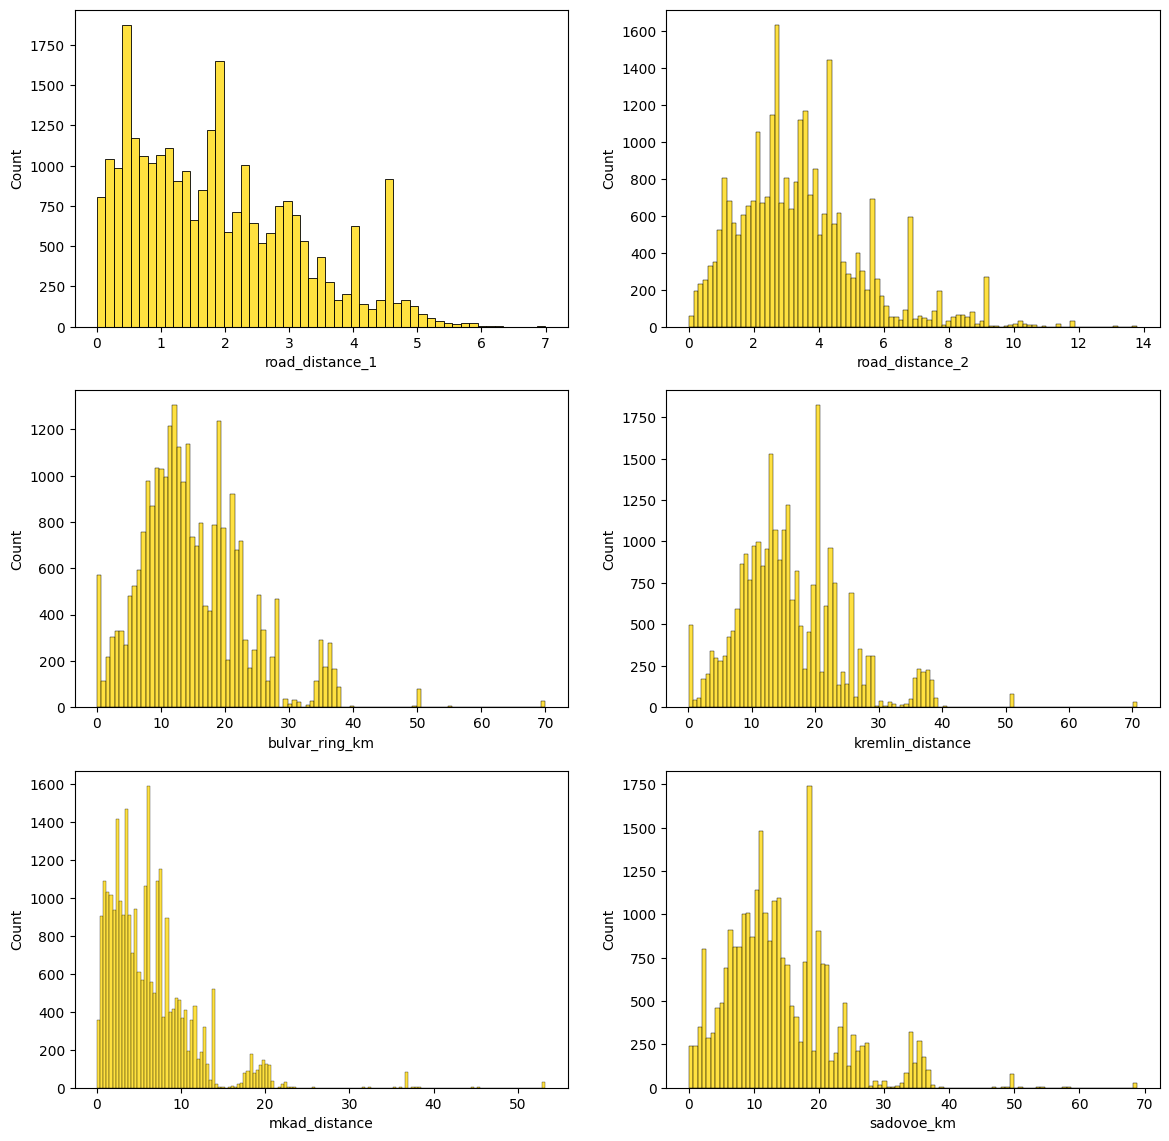

In [53]:
plot_hists(_df, f_names)

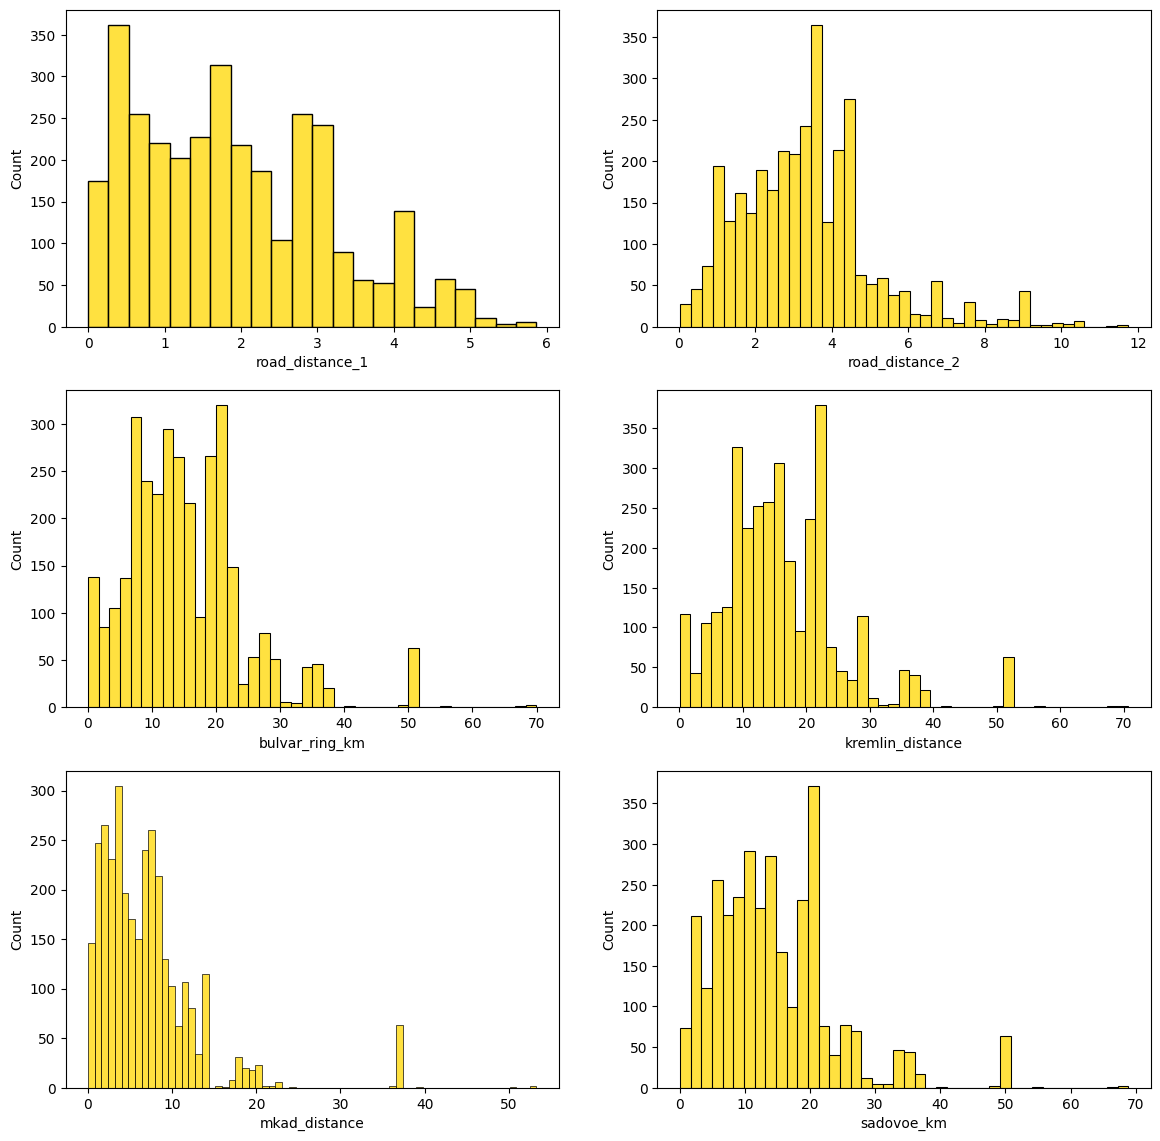

In [54]:
plot_hists(_df_test, f_names)

## Local distances [ok]

bus_station_distance, fitness_center_distance, green_zone_distance, park_distance, public_transport_station_distance, base_school_distance, railway_station_distance

In [134]:
f_names = [
    "bus_station_distance", 
    "fitness_center_distance", 
    "green_zone_distance", 
    "park_distance", 
    "public_transport_station_distance", 
    "base_school_distance", 
    "railway_station_distance",
]

In [135]:
_df = train_df[f_names]
_df_test = test_df[f_names]
_df.describe()

,bus_station_distance,fitness_center_distance,green_zone_distance,park_distance,public_transport_station_distance,base_school_distance,railway_station_distance
count,27232.000000,27232.000000,27232.000000,27232.000000,27232.000000,27232.000000,27232.000000
mean,9.887480,1.137891,0.301791,3.082367,4.598270,1.262056,17.158996
std,7.192342,1.519172,0.301902,3.947962,13.538111,2.874984,10.168566
min,0.062026,0.000000,0.000000,0.003737,0.033646,0.000000,0.136715
25%,5.211726,0.358399,0.099409,0.973781,1.192541,0.269716,10.030476
50%,7.447586,0.652145,0.214365,1.799915,1.894101,0.465666,14.721305
75%,13.180831,1.306011,0.417137,3.345030,3.135588,0.834949,24.061214
max,74.469967,24.852968,1.939617,47.351538,208.956021,47.394706,90.888919


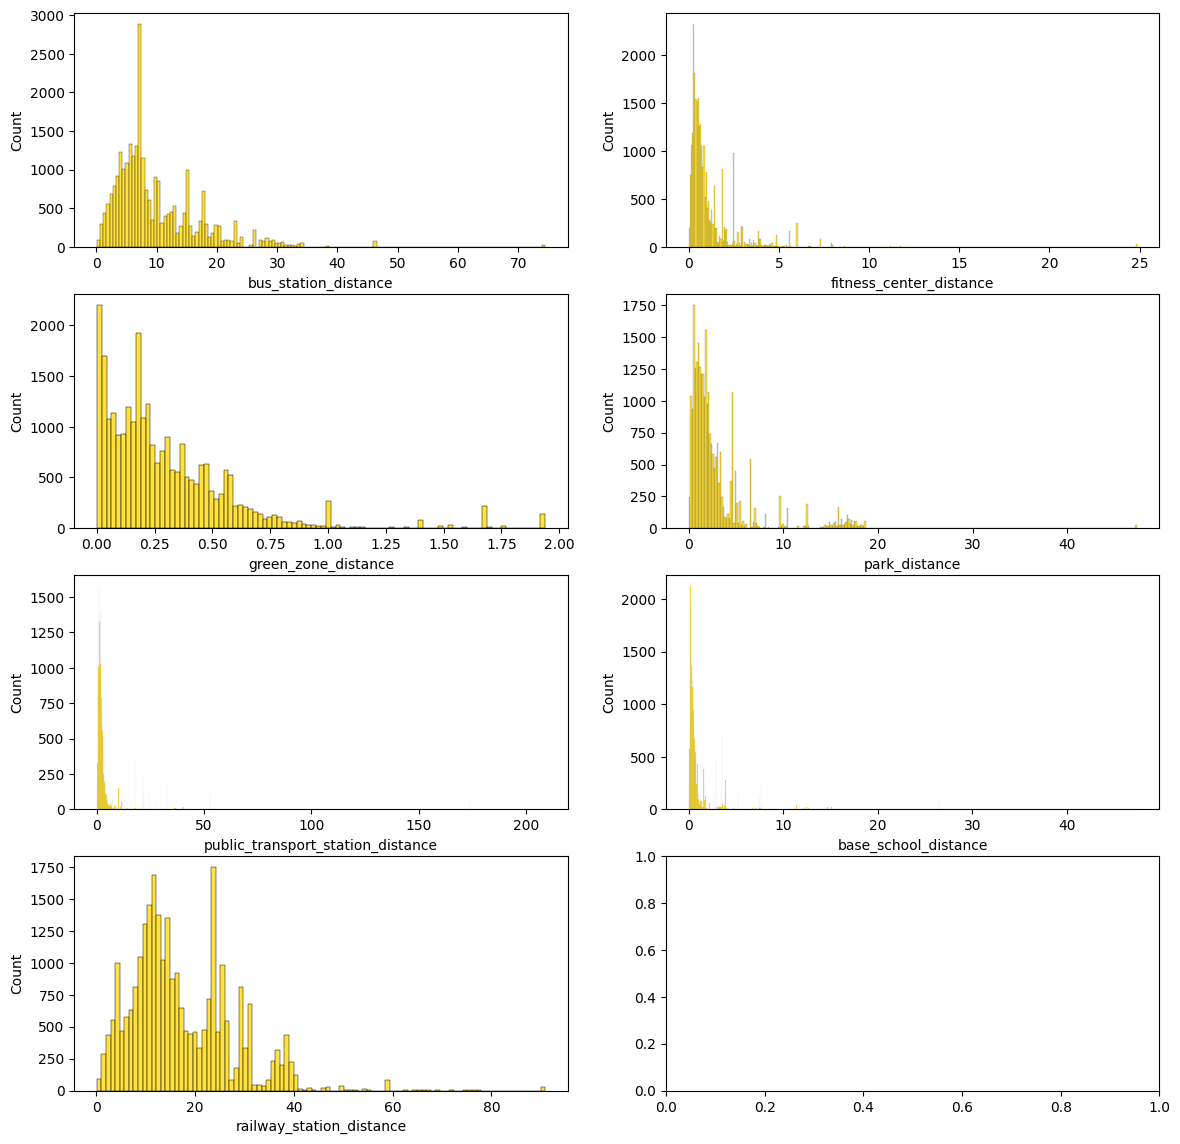

In [136]:
plot_hists(_df, f_names)

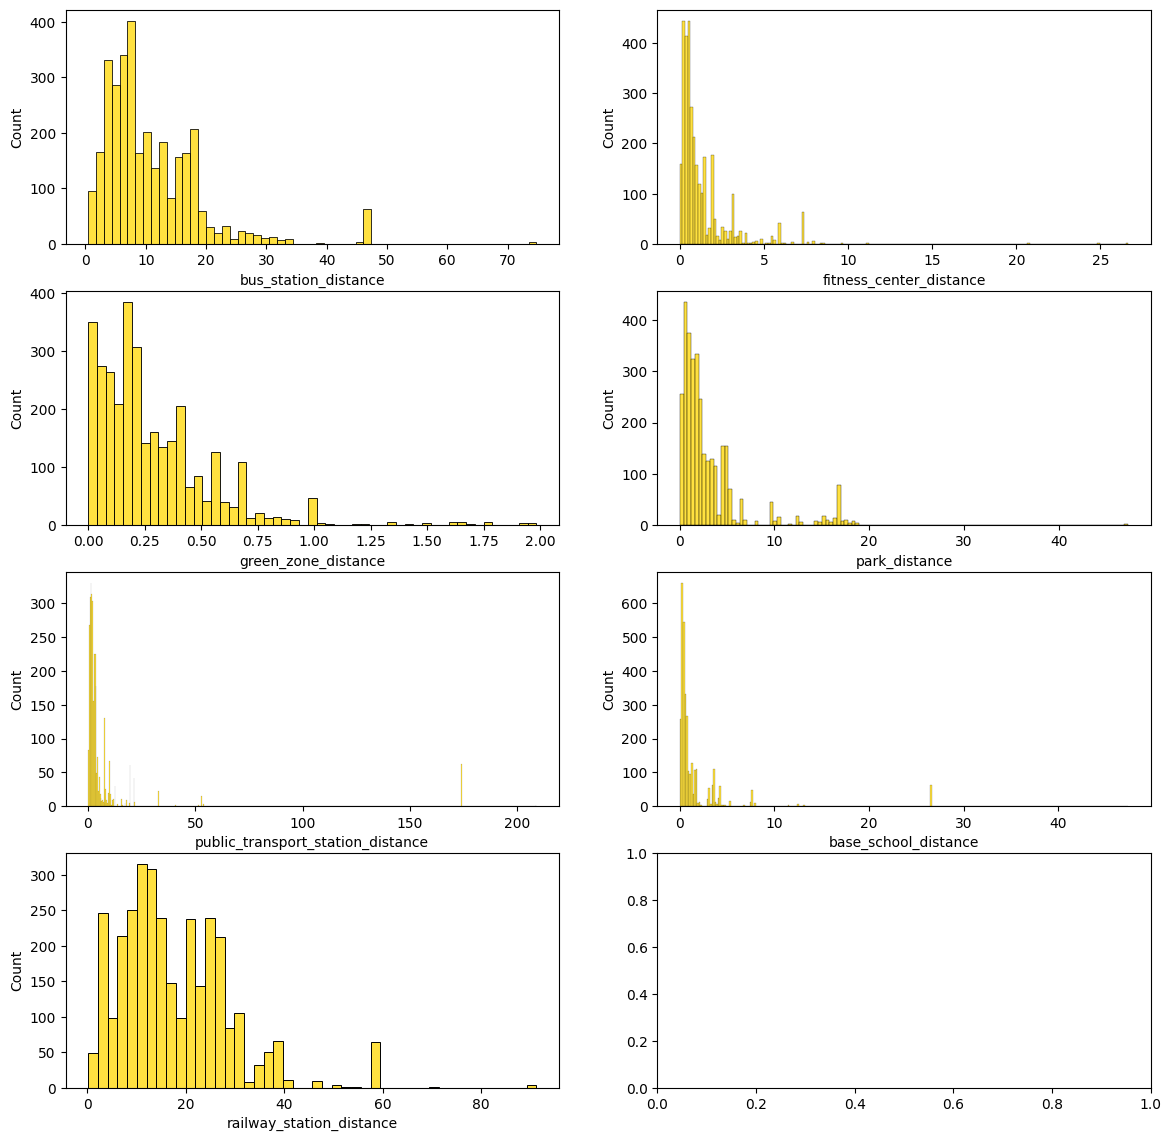

In [139]:
plot_hists(_df_test, f_names)

In [138]:
_df[_df["public_transport_station_distance"] > 100]

,bus_station_distance,fitness_center_distance,green_zone_distance,park_distance,public_transport_station_distance,base_school_distance,railway_station_distance
6152,46.819805,9.596496,0.109379,20.511549,139.597240,27.931643,62.477897
10824,51.166570,15.806881,0.548516,24.099274,123.585723,25.095537,67.585522
12742,74.469967,24.852968,0.091069,47.351538,208.956021,47.394706,90.888919
12770,46.444751,7.354662,0.556235,16.769467,173.891866,26.499723,59.273863
14426,56.060825,8.645612,0.060627,26.033855,177.321833,34.537964,71.718916
...,...,...,...,...,...,...,...
26609,46.444751,7.354662,0.556235,16.769467,173.891866,26.499723,59.273863
26880,46.444751,7.354662,0.556235,16.769467,173.891866,26.499723,59.273863
26923,74.469967,24.852968,0.091069,47.351538,208.956021,47.394706,90.888919
27039,46.444751,7.354662,0.556235,16.769467,173.891866,26.499723,59.273863


In [140]:
_df_test[_df_test["public_transport_station_distance"] > 100]

,bus_station_distance,fitness_center_distance,green_zone_distance,park_distance,public_transport_station_distance,base_school_distance,railway_station_distance
139,74.469967,24.852968,0.091069,47.351538,208.956021,47.394706,90.888919
145,46.444751,7.354662,0.556235,16.769467,173.891866,26.499723,59.273863
209,46.444751,7.354662,0.556235,16.769467,173.891866,26.499723,59.273863
367,46.444751,7.354662,0.556235,16.769467,173.891866,26.499723,59.273863
422,46.444751,7.354662,0.556235,16.769467,173.891866,26.499723,59.273863
...,...,...,...,...,...,...,...
2993,46.444751,7.354662,0.556235,16.769467,173.891866,26.499723,59.273863
3077,46.444751,7.354662,0.556235,16.769467,173.891866,26.499723,59.273863
3080,46.444751,7.354662,0.556235,16.769467,173.891866,26.499723,59.273863
3097,46.444751,7.354662,0.556235,16.769467,173.891866,26.499723,59.273863


## Local info [ok]

cafe_count, green_part, healthcare_centers_count, leisure_count, office_count, sport_count, malls_count

In [92]:
f_names = [
    "cafe_count", 
    "green_part", 
    "healthcare_centers_count",
    "leisure_count", 
    "office_count", 
    "sport_count", 
    "malls_count",
    "metro_minutes",
]

In [94]:
_df = train_df[f_names]
_df_test = test_df[f_names]
_df.describe()

,cafe_count,green_part,healthcare_centers_count,leisure_count,office_count,sport_count,malls_count,metro_minutes
count,27232.000000,27232.000000,27232.000000,27232.000000,27232.000000,27232.000000,27232.000000,27216.000000
mean,261.142920,22.620650,1.327556,8.461112,69.944771,52.682689,30.152027,41.952609
std,504.904645,11.131988,1.497016,20.191333,152.546008,45.742442,23.689530,66.449647
min,0.000000,3.520000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,14.780000,0.000000,0.000000,2.000000,11.000000,7.000000,11.322397
50%,108.000000,19.660000,1.000000,2.000000,15.000000,48.000000,31.000000,20.242873
75%,221.000000,31.040000,2.000000,7.000000,52.000000,75.000000,43.000000,45.322032
max,2645.000000,75.460000,6.000000,106.000000,789.000000,218.000000,120.000000,711.215806


In [95]:
_df_test.describe()

,cafe_count,green_part,healthcare_centers_count,leisure_count,office_count,sport_count,malls_count,metro_minutes
count,3239.000000,3239.000000,3239.000000,3239.000000,3239.000000,3239.000000,3239.000000,3230.000000
mean,302.400123,24.021494,1.264897,10.226922,83.223217,53.754245,29.962334,49.351947
std,588.137620,11.759423,1.456887,23.546389,176.688188,50.680503,25.814965,89.556203
min,0.000000,3.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.102013
25%,20.000000,14.950000,0.000000,0.000000,3.000000,10.000000,5.000000,12.746659
50%,103.000000,21.870000,1.000000,2.000000,15.000000,45.000000,31.000000,20.715515
75%,230.000000,32.940000,2.000000,7.000000,61.000000,77.000000,44.000000,42.961665
max,2625.000000,68.350000,6.000000,105.000000,774.000000,218.000000,119.000000,687.316548


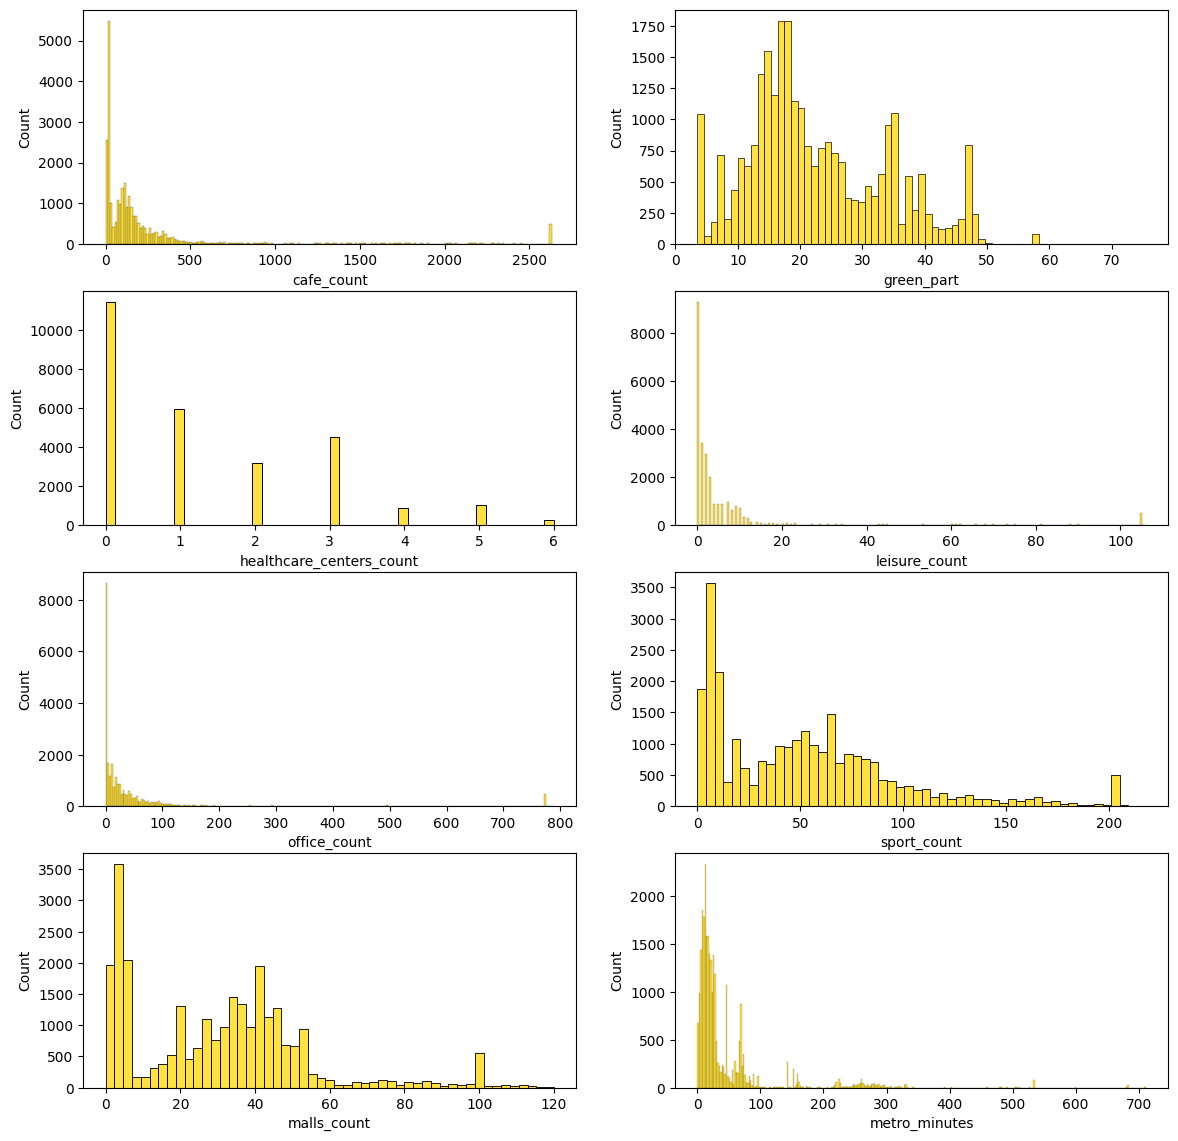

In [96]:
plot_hists(_df, f_names)

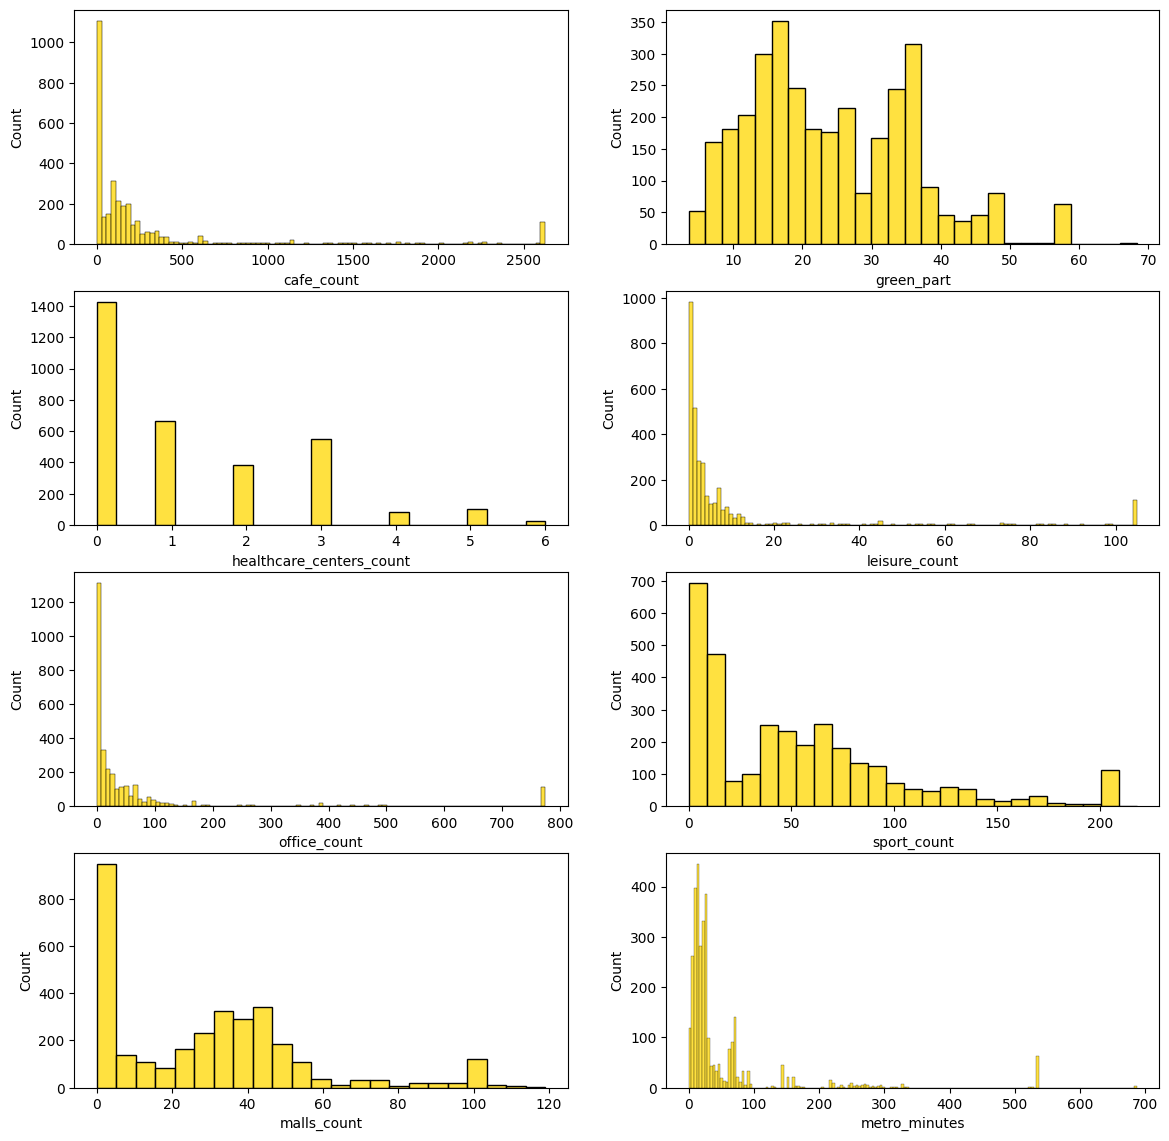

In [97]:
plot_hists(_df_test, f_names)

In [98]:
_df[_df["metro_minutes"] > 400]

,cafe_count,green_part,healthcare_centers_count,leisure_count,office_count,sport_count,malls_count,metro_minutes
6152,1,60.50,0,0,0,0,0,600.323570
7717,0,51.09,0,0,0,0,0,504.235505
10761,0,48.47,0,0,1,0,0,479.739711
10824,0,46.23,0,0,0,0,0,403.762054
12742,1,40.59,0,0,0,0,0,683.402824
...,...,...,...,...,...,...,...,...
26609,0,57.70,0,0,0,0,0,534.645955
26880,0,57.70,0,0,0,0,0,534.645955
26923,1,40.59,0,0,0,0,0,683.402824
27039,0,57.70,0,0,0,0,0,534.645955


In [99]:
train_df.iloc[6152]

district_area                                      148701635.4
road_distance_1                                       0.848299
road_distance_2                                       6.482828
year_of_construction                                       NaN
bulvar_ring_km                                       52.050949
bus_station_distance                                 46.819805
cafe_count                                                   1
fitness_center_distance                               9.596496
floor                                                      5.0
district_population                                       8384
total_area                                                  29
green_part                                                60.5
green_zone_distance                                   0.109379
healthcare_centers_count                                     0
id                                                        6155
kitchen_area                                           

## Flat info [remove outliers]

floor, total_area, kitchen_area, rooms_num

In [142]:
f_names = [
    "floor", 
    "total_area", 
    "kitchen_area", 
    "rooms_num",
]

In [147]:
len(train_df), len(test_df)

(27232, 3239)

In [143]:
_df = train_df[f_names]
_df_test = test_df[f_names]
_df.describe()

,floor,total_area,kitchen_area,rooms_num
count,27065.000000,27232.000000,17660.000000,17660.000000
mean,7.680473,53.830126,6.376784,1.898301
std,5.327727,39.424629,26.824958,0.847622
min,0.000000,0.000000,0.000000,0.000000
25%,3.000000,38.000000,1.000000,1.000000
50%,7.000000,48.000000,6.000000,2.000000
75%,11.000000,63.000000,9.000000,2.000000
max,77.000000,5326.000000,2014.000000,19.000000


In [144]:
_df_test.describe()

,floor,total_area,kitchen_area,rooms_num
count,3239.000000,3239.000000,3239.000000,3239.000000
mean,7.589997,57.443964,6.522075,1.972522
std,5.255002,22.971379,35.101944,0.871722
min,1.000000,12.000000,0.000000,0.000000
25%,3.000000,41.000000,1.000000,1.000000
50%,6.000000,53.000000,6.000000,2.000000
75%,11.000000,67.000000,9.000000,3.000000
max,44.000000,407.000000,1974.000000,10.000000


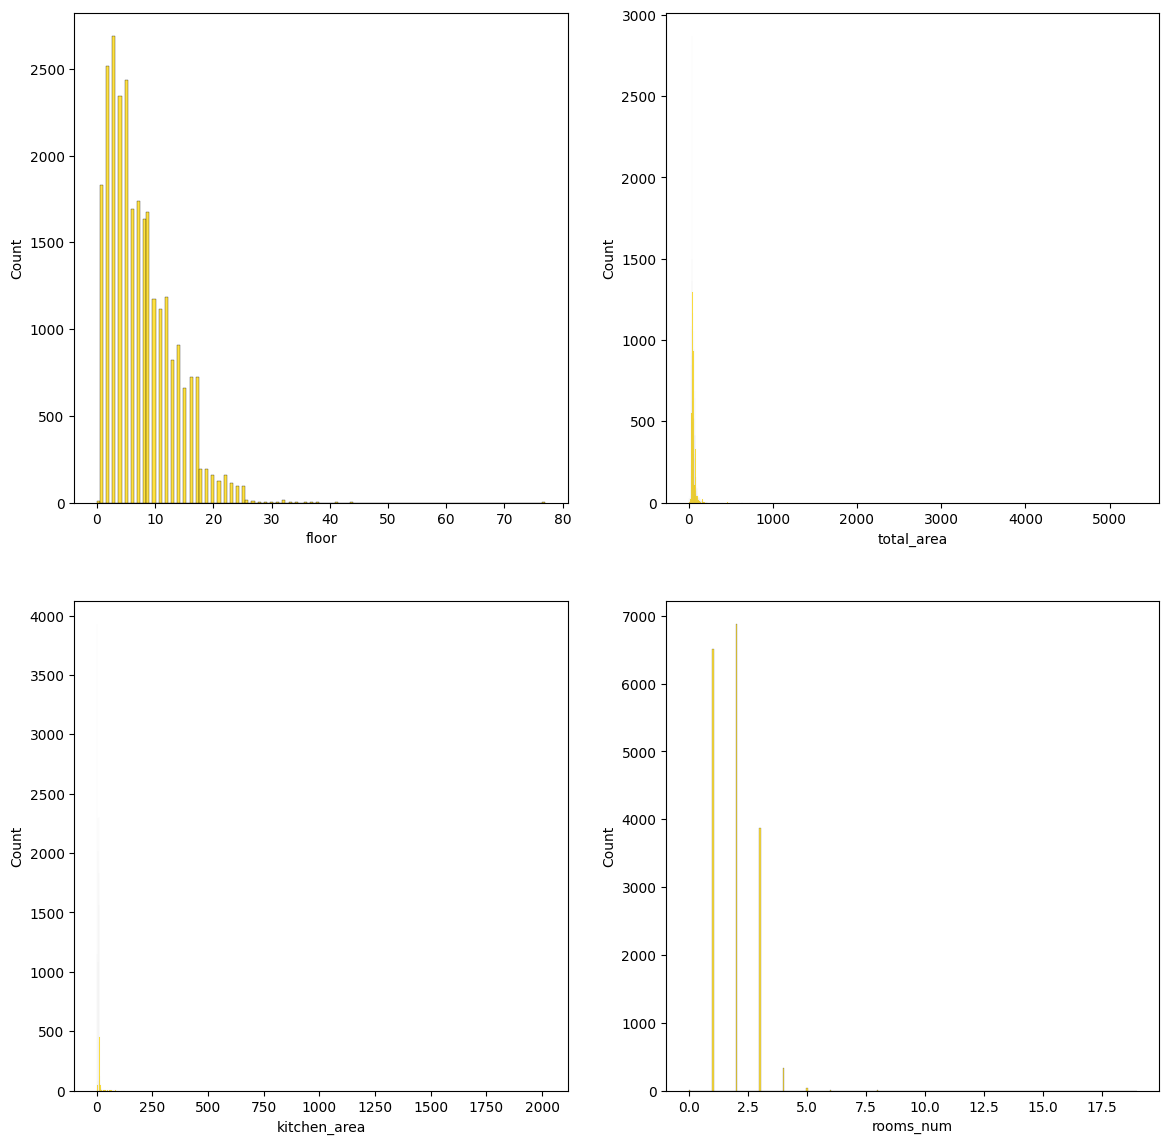

In [145]:
plot_hists(_df, f_names)

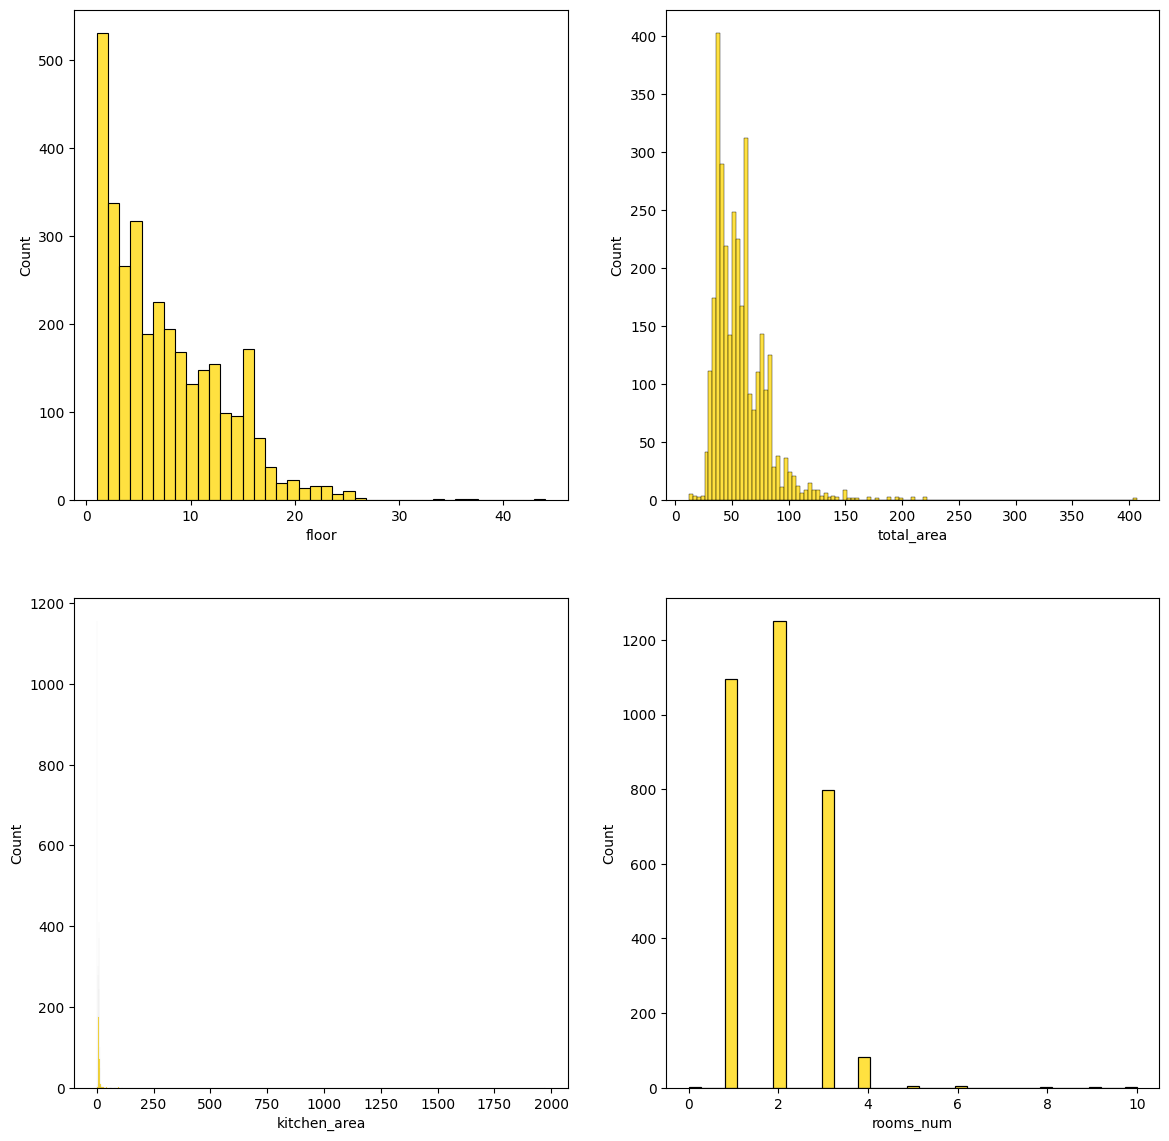

In [146]:
plot_hists(_df_test, f_names)

### kitchen_area

In [89]:
_df[_df["kitchen_area"] > 100]

,floor,total_area,kitchen_area,rooms_num
8949,3.0,123,123.0,3.0
10368,5.0,79,2013.0,3.0
11520,11.0,38,620.0,2.0
13117,5.0,31,1970.0,1.0
20053,3.0,112,112.0,3.0
21415,3.0,43,2014.0,1.0


In [91]:
train_df.iloc[10368]

district_area                                     21494094.8
road_distance_1                                     4.586082
road_distance_2                                     5.602182
year_of_construction                                  2013.0
bulvar_ring_km                                      25.03211
bus_station_distance                               10.125933
cafe_count                                                18
fitness_center_distance                             0.822324
floor                                                    5.0
district_population                                     9553
total_area                                                79
green_part                                             17.74
green_zone_distance                                 0.456704
healthcare_centers_count                                   0
id                                                     10371
kitchen_area                                          2013.0
kremlin_distance        

In [90]:
_df_test[_df_test["kitchen_area"] > 100]

,floor,total_area,kitchen_area,rooms_num
699,3.0,112,112.0,3.0
764,3.0,112,112.0,3.0
1502,2.0,31,1974.0,1.0


In [88]:
_df[_df["kitchen_area"] >= _df["total_area"]]

,floor,total_area,kitchen_area,rooms_num
8056,2.0,11,12.0,1.0
8949,3.0,123,123.0,3.0
9172,9.0,37,73.0,1.0
10187,25.0,54,54.0,2.0
10368,5.0,79,2013.0,3.0
...,...,...,...,...
26780,1.0,39,39.0,1.0
26813,14.0,95,95.0,3.0
26850,4.0,38,86.0,1.0
26925,17.0,1,1.0,1.0


In [73]:
_df_test[_df_test["kitchen_area"] >= _df_test["total_area"]]

,floor,total_area,kitchen_area,rooms_num
163,13.0,62,62.0,2.0
418,2.0,43,43.0,1.0
699,3.0,112,112.0,3.0
764,3.0,112,112.0,3.0
1082,7.0,58,58.0,2.0
1202,22.0,96,96.0,3.0
1477,11.0,41,41.0,1.0
1480,11.0,41,41.0,1.0
1502,2.0,31,1974.0,1.0
1765,4.0,50,97.0,2.0


In [76]:
# build linear reg from total_area x rooms_num -> kitchen_area
from sklearn.linear_model import LinearRegression
# clean_df = 
# lin_reg = LinearRegression()

set to None

### total_area

In [107]:
_df[_df["total_area"] < 5]

,floor,total_area,kitchen_area,rooms_num
11332,10.0,1,1.0,1.0
16289,1.0,1,1.0,1.0
16738,1.0,1,1.0,1.0
17194,1.0,1,1.0,1.0
17932,0.0,0,0.0,0.0
18600,1.0,1,1.0,1.0
22171,1.0,1,1.0,1.0
22412,11.0,1,1.0,1.0
22722,1.0,1,1.0,1.0
22795,7.0,1,1.0,3.0


In [108]:
train_df.iloc[22871]

district_area                          11391678.48
road_distance_1                           3.481845
road_distance_2                           4.331123
year_of_construction                        2015.0
bulvar_ring_km                           18.324596
bus_station_distance                      7.006239
cafe_count                                      13
fitness_center_distance                    2.75715
floor                                          1.0
district_population                         247469
total_area                                       1
green_part                                    14.0
green_zone_distance                       1.939617
healthcare_centers_count                         0
id                                           22874
kitchen_area                                   1.0
kremlin_distance                         19.691904
leisure_count                                    0
living_area                                    1.0
market_count                   

### floor

In [148]:
_df[_df["floor"] == 0]

,floor,total_area,kitchen_area,rooms_num
5085,0.0,157,NaN,NaN
5333,0.0,181,NaN,NaN
15363,0.0,58,0.0,1.0
17932,0.0,0,0.0,0.0
18669,0.0,209,0.0,0.0
21222,0.0,74,0.0,2.0
21921,0.0,160,0.0,3.0
23637,0.0,78,0.0,3.0
25424,0.0,81,15.0,2.0


set to None

### rooms_num

In [149]:
_df[_df["rooms_num"] == 0]

,floor,total_area,kitchen_area,rooms_num
10452,15.0,48,0.0,0.0
11183,11.0,40,0.0,0.0
11791,24.0,54,0.0,0.0
15992,10.0,58,0.0,0.0
17932,0.0,0,0.0,0.0
18123,3.0,112,0.0,0.0
18669,0.0,209,0.0,0.0
20670,4.0,79,0.0,0.0
21439,12.0,74,12.0,0.0
23191,3.0,84,0.0,0.0


set to None

## Other [remove outlier]

product_type, state, district_name, district_population

In [141]:
f_names = [
    "product_type", 
    "state",
    "district_name",
    "district_population",
]

In [110]:
_df = train_df[f_names]
_df_test = test_df[f_names]
_df.describe()

,state,district_population
count,14135.000000,2.723200e+04
mean,2.145101,1.484722e+05
std,0.876860,2.847112e+05
min,1.000000,2.546000e+03
25%,1.000000,3.116700e+04
50%,2.000000,8.572100e+04
75%,3.000000,1.253540e+05
max,33.000000,1.716730e+06


In [111]:
_df_test.describe()

,state,district_population
count,2777.000000,3.239000e+03
mean,1.913216,1.280949e+05
std,0.871434,2.677805e+05
min,1.000000,2.693000e+03
25%,1.000000,1.779000e+04
50%,2.000000,7.787800e+04
75%,3.000000,1.167420e+05
max,4.000000,1.716730e+06


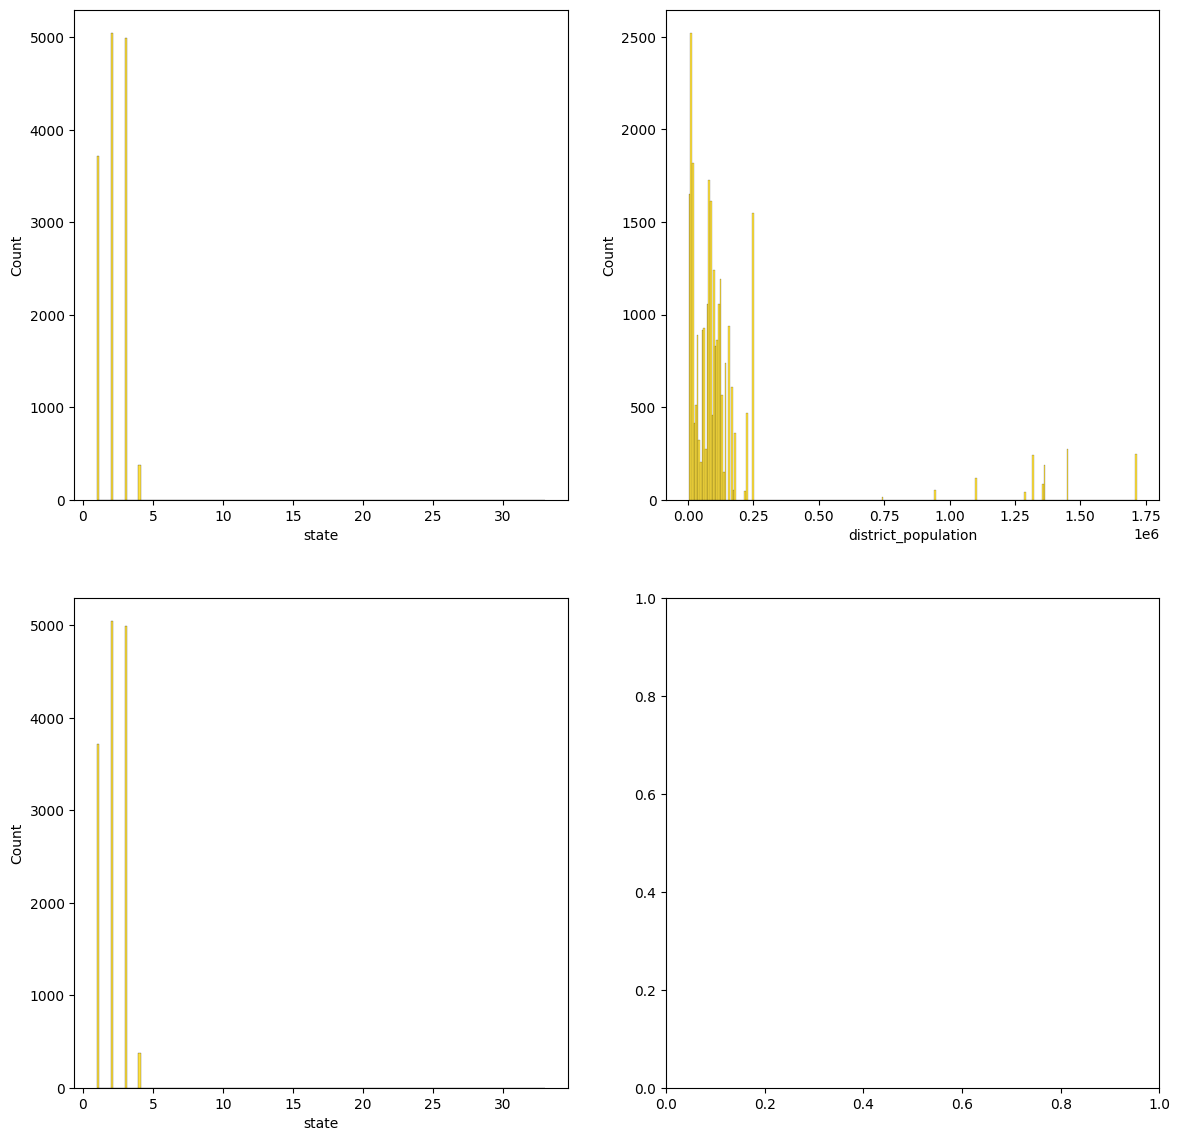

In [115]:
plot_hists(_df, ["state", "district_population", "state"])

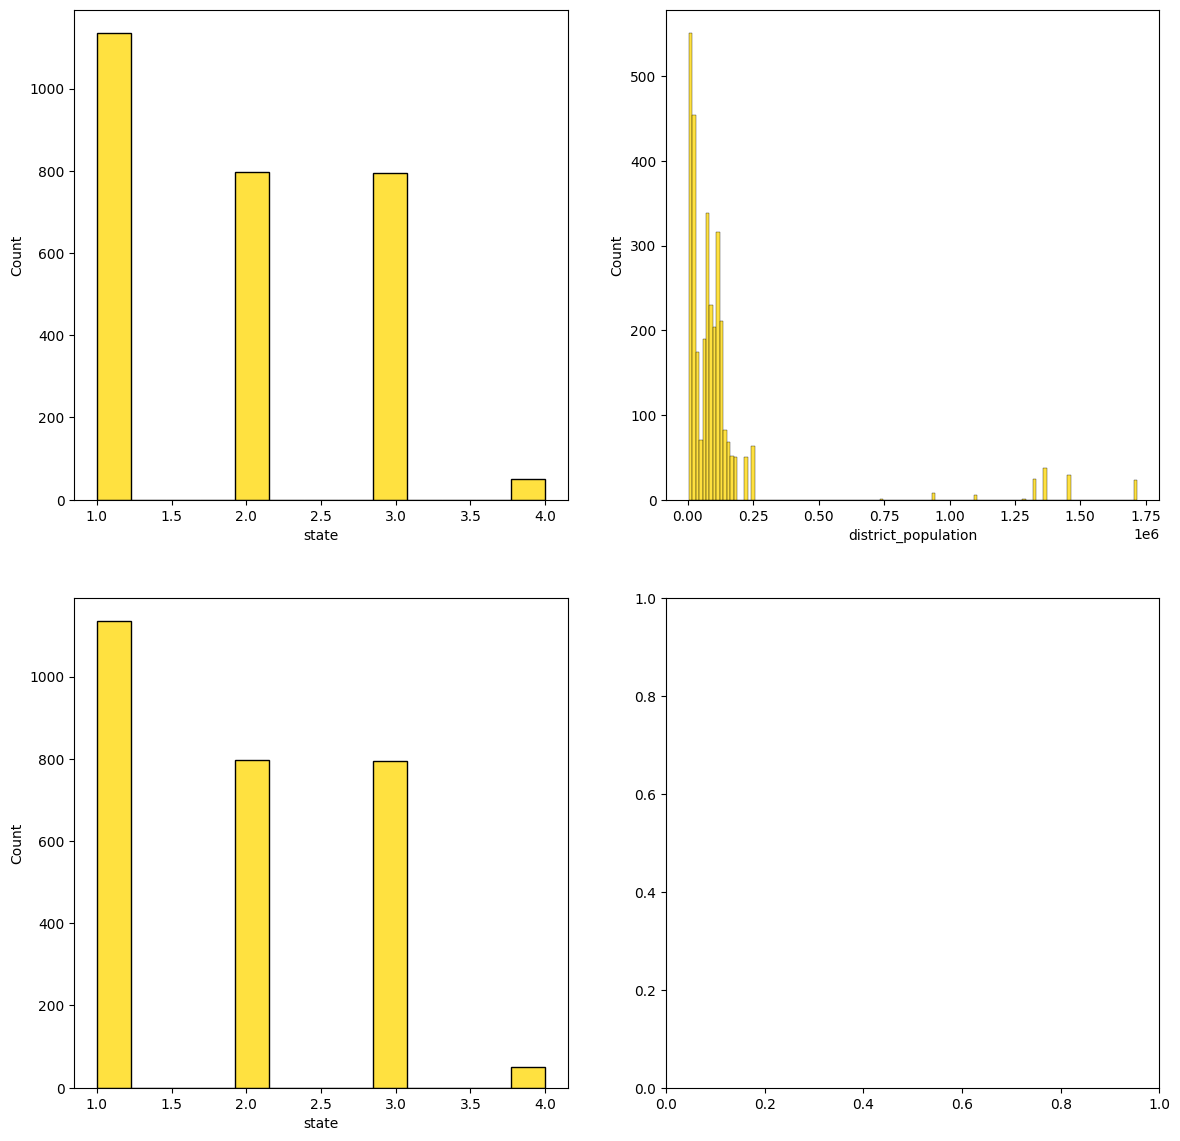

In [116]:
plot_hists(_df_test, ["state", "district_population", "state"])

### state

In [117]:
_df[_df["state"] > 4]

,product_type,state,district_name,district_population
10089,Investment,33.0,Cheremushki,130396


In [119]:
_df[_df["district_name"] == "Cheremushki"]["state"].value_counts()

3.0     40
2.0     33
4.0      5
33.0     1
1.0      1
Name: state, dtype: int64

set `state` to None

### product_type

In [125]:
_df["product_type"].value_counts(), np.sum(_df["product_type"].isna())

(Investment       17693
 OwnerOccupier     9539
 Name: product_type, dtype: int64,
 0)

In [126]:
_df_test["product_type"].value_counts(), np.sum(_df_test["product_type"].isna())

(Investment       1755
 OwnerOccupier    1484
 Name: product_type, dtype: int64,
 0)

### district_name

In [132]:
_df["district_name"].value_counts()

Nekrasovka                        1547
Poselenie Sosenskoe               1526
Poselenie Vnukovskoe              1064
Poselenie Moskovskij               815
Poselenie Voskresenskoe            697
                                  ... 
Poselenie Shhapovskoe                2
Poselenie Kievskij                   2
Molzhaninovskoe                      2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: district_name, Length: 146, dtype: int64

In [130]:
_df_test["district_name"].value_counts()

Poselenie Vnukovskoe         308
Poselenie Sosenskoe          250
Tverskoe                     118
Poselenie Moskovskij         110
Nagatinskij Zaton             98
                            ... 
Severnoe                       1
Molzhaninovskoe                1
Poselenie Kokoshkino           1
Poselenie Krasnopahorskoe      1
Kapotnja                       1
Name: district_name, Length: 140, dtype: int64

one-hot? encoding

## Time [remove outlires]